# Deriving the Maxwell Equations

To derive the Maxwell source equations, the Lorentz invariant quantity:

$$B^2 - E^2$$

is put in the Euler-Lagrange equations, and the result is both Gauss's law and Ampere's law. In a standard derivation one does a contraction of two rank-2 anti-symmetric field strength tensors:

$$F^{\mu \nu} F_{\mu \nu} = B^2 - E^2$$

The field strength tensor $F^{\mu \nu}$ is a complicated structure, with each of the 6 EM fields sitting in their own isolated room. If one were to show the first equation to anyone with high school algebra, they would think that should be the result of a simple product:

$$B^2 - E^2 =?= (B + E)(B - E)$$

With the space-time number approach, both the $E$ and $B$ fields necessarily have 4 terms, but the first one happens to be zero for both. As has been my pattern in this library, if I brake a universal convention to make something a "space-time number" in terms of its algebraic qualities, I will add a \_q. Thus I work with $E\_q$ and $B\_q$.  The goal here is to get to:

$$(0, B - E)(0, -B -E) = (B^2 - E^2, 2 E \times B)$$

Load the needed libraries. Note that Qs.py is a library for manipulating space-time numbers and space-time number series written by the author.

In [1]:
%%capture
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
import unittest

# To get equations the look like, well, equations, use the following.
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display

# Tools for manipulating quaternions.
from Qs import *

from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.container { width:100% !important; }</style>"))

The first thing to do is define variables and functions for sympy to use and define the EM potential.

In [2]:
t, x, y, z = sp.symbols("t x y z")
φ, Ax, Ay, Az = sp.Function("φ"), sp.Function("Ax"), sp.Function("Ay"), sp.Function("Az")
φ(t, x, y, z).diff(t)

In [3]:
EM_potential = Q([φ(t, x, y, z), Ax(t, x, y, z), Ay(t, x, y, z), Az(t, x, y, z)])
simpler = {φ(t, x, y, z): "φ", Ax(t, x, y, z): "Ax", Ay(t, x, y, z): "Ay", Az(t, x, y, z): "Az"}
EM_potential.subs(simpler).print_state("EM potential")

EM potential
(φ, Ax, Ay, Az) 



Take the space-time number derivative of the EM potential.

D EM_potential


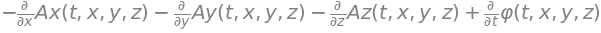

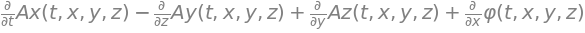

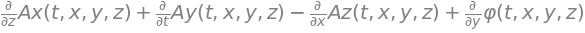

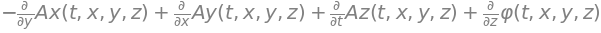

In [5]:
D_EM_potential = Dq(EM_potential, [t, x, y, z])
D_EM_potential.display("D EM_potential")

While this answer is correct, it has too many marks to be understood with ease. Create a list of substitutions that can do all the basic EM fields.

D EM_potential fields


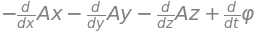

In [6]:
fields = {-Ax(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(x): "Ex", -Ay(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(y): "Ey", -Az(𝑡,𝑥,𝑦,𝑧).diff(t)-φ(𝑡,𝑥,𝑦,𝑧).diff(z): "Ez",
         Az(𝑡,𝑥,𝑦,𝑧).diff(y)-Ay(𝑡,𝑥,𝑦,𝑧).diff(z): "Bx", Ax(𝑡,𝑥,𝑦,𝑧).diff(z)-Az(𝑡,𝑥,𝑦,𝑧).diff(x): "By", Ay(𝑡,𝑥,𝑦,𝑧).diff(x)-Ax(𝑡,𝑥,𝑦,𝑧).diff(y): "Bz", 
          φ(t, x, y, z): "φ", Ax(t, x, y, z): "Ax", Ay(t, x, y, z): "Ay", Az(t, x, y, z): "Az"}
D_EM_potential.subs(fields).display("D EM_potential fields")

The first term is a gauge field. For massless photons, the gauge field must be set to zero. I suspect a non-zero gauge field may be used for particles that are not photons. Such a link has not been created. Note to self: see if the gauge field is invariant under a Lorentz boost. 

The second three terms are the difference between the magnetic and electric fields. To this day, this strikes me as _stunning_. Nothing was done other than take the space-time number derivative of a space-time potential and there are the two fields that make up EM. 

In the standard approach to EM, the difference of these fields _living in the same terms_ may be considered by some to be an abomination. The electric and magnetic fields are normally carefully put in separate rooms by the anti-symmetric rank-2 field strength tensor $F_{\mu\nu}$. The reason the standard approach must keep things separate is there is not general-utility rule for forming products as there is for space-time numbers. This is the non-trivial difference between working with tensors as is done today and trying to rebuild from the ground up with space-time numbers.

Make the difference in EM fields gauge-free.

In [7]:
gauge_free_EM = vector_q(D_EM_potential)
gauge_free_EM.subs(fields).display("gauge-free EM")

gauge-free EM


Take the derivative of the potential again, this time reversing the order of the differential and the potential. This will flip only the signs of the curl or $B\_q$ field.

In [8]:
gauge_free_ME = vector_q(Dq(EM_potential, [t, x, y, z], reverse=True))
gauge_free_ME.subs(fields).display("gauge-free reverse D")

gauge-free reverse D


Form the product of these two fields.

In [12]:
EM_invariant_Poynting = product(gauge_free_EM, gauge_free_ME)
EM_invariant_Poynting.subs(fields).expand().display("EM invariant, Poynting")

EM invariant, Poynting


The first term is invariant under a Lorentz transformation. The other three terms are called the Poynting vector. It is a measure of energy flux in electromagnetic fields. Poynting vectors change under Lorentz boosts. The first term will be invariant under both time and space reflections because of the square. This concerns some because it means that the Maxwell equations will also be unaltered by such changes. This creates what some would call a problem with the arrow of time. This issue also applies to the weak and strong forces which are structurally similar to EM with different gauge symmetries. The Poynting vector on the other hand does flip signs under both reflections in time or space. Because the Poynting vector is _necessarily connected_ to the difference of the squares of the EM fields, for me the concerns about the arrow of time are eliminated since the arrow is represented by the Poynting vector.

In standard derivations of the Maxwell equations, one included a factor of a half. I don't see the need, so have gone for a simpler expression.

The current density is coupled to EM potential. The first term of the product of the potential with the current density is Lorentz invariant.

In [13]:
ρ, Jx, Jy, Jz = sp.symbols("ρ Jx Jy Jz")
current_density = Q([ρ, Jx, Jy, Jz])
current_potential = product(current_density, EM_potential)
current_potential.display("current/potential coupling")

current/potential coupling


Apply the Euler-Lagrange equations to the first termes of the EM invariant and the current/potential coupling.

In [14]:
from sympy.calculus.euler import euler_equations

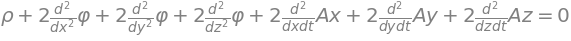

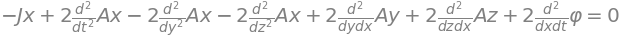

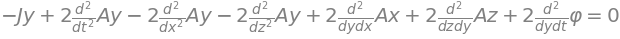

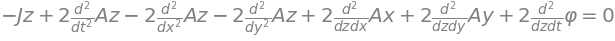

In [15]:
display(euler_equations(EM_invariant_Poynting.t + current_potential.t , φ(t, x, y, z), [t, x, y, z])[0].subs(simpler))
display(euler_equations(EM_invariant_Poynting.t + current_potential.t , Ax(t, x, y, z), [t, x, y, z])[0].subs(simpler))
display(euler_equations(EM_invariant_Poynting.t + current_potential.t , Ay(t, x, y, z), [t, x, y, z])[0].subs(simpler))
display(euler_equations(EM_invariant_Poynting.t + current_potential.t , Az(t, x, y, z), [t, x, y, z])[0].subs(simpler))

I have not been successful in using a substitution dictionary to write out these 4 equations in the standard form, as first order equations for $\vec{E}$ and $\vec{B}$. For the first equation, there are 2 spatial derivatives of $\phi$, so that indicates one is taking the divergence. Put the differentials on the other side, and the result is:

$$\rho = \nabla \cdot E$$

if

$$\vec{E}_q = (0, - 2 \frac{\partial \vec{A}}{\partial t} - 2 \vec{\nabla} \phi)$$

This is Gauss's law.

There may be some who would argue that the **factor of 2** means this approach is in error. One can go out and directly measure electric and magnetic fields. The same cannot be said about potentials. Potentials are real things as demonstrated by the Aharonov-Bohm effect. Measuring potentials is not, so a factor of 2 is a change of scale. For me, simplicity trumps tradition.

The other three equations have a pattern. Put the current density on the other side. The first and last differentials together make up a time derivative of the negative electric field. The only way I know how to figure out the pattern of $\vec{\nabla} \times (\vec{\nabla} \times \vec{A})$ is with pencil and paper. There is a pattern. The curl of the $B_x$ term has 2 negative terms that are second order for $A_x$ in $y$ and in $z$. There will be two positive mixed terms that use $A_y$ and $A_z$. With this knowledge, we can rewrite the last three equations like so:

$$\vec{J} = \vec{\nabla} \times \vec{B} - \frac{\partial \vec{E}}{\partial t}$$

if 

$$\vec{B}_q = (0, 2 \vec{\nabla} \times \vec{A})$$

This is Ampere's law.

In the name of logical consistency, I prefer to write both Gauss's law and Ampere's law as one space-time number expression as it was derived:

$$(\rho, \vec{J}) = \left(\nabla \cdot E, \vec{\nabla} \times \vec{B} - \frac{\partial \vec{E}}{\partial t}\right)$$

To my eye, it makes more clear: one space-time number expression is about the complete current density's relationship to changing electromagnetic fields.

How complicated does it look to derive the Maxwell source equations in a few lines? Let me try...

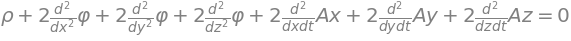

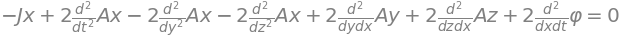

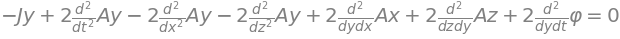

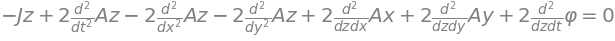

In [16]:
p4 = [φ(t, x, y, z), Ax(t, x, y, z), Ay(t, x, y, z), Az(t, x, y, z)]
φAxyz = Q(p4)
ρJxyz = Q([ρ, Jx, Jy, Jz])
txyz = [t, x, y, z]

for p in p4:
    display(euler_equations(
        add(
            product(vector_q(Dq(φAxyz, txyz)), vector_q(Dq(φAxyz, txyz, reverse=True))),
            product(φAxyz, ρJxyz)).t, p)[0].subs(simpler))

The Maxwell source equations are derived in under 10 lines. The first 4 lines define the players: the EM potential and current density as space-time numbers, and variables needed for the Euler-Lagrange equations. We loop through the 4 potentials to apply the Euler-Lagrage equations. It is hope the gentle reader can spot both Gauss's and Ampere's law.



A specific technical choice was made in the process. Notice the ".t" which plucks out the first term of the space-time number expression for both the fields and the coupling terms. For the sake of logical completeness, repeat the exercise for the first spacial component, ".x":

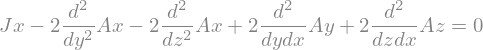

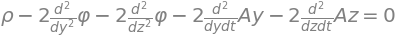

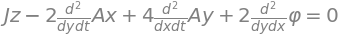

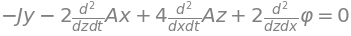

In [27]:
for p in p4:
    display(euler_equations(
        add(
        product(vector_q(Dq(φAxyz, txyz, reverse=False)), 
                vector_q(Dq(φAxyz, txyz, reverse=True))),
        product(φAxyz, ρJxyz)).x, p)[0].subs(simpler))

This set of four equations is about phases of EM fields. It is an open question about if these expressions will every be of value to understanding Nature. The first two equations can be written in terms of the magnetic $B_x$ and electric fields $E_y, \,E_z$ respectively. The third and forth expressions resist being reformulated using electric or magnetic fields.

## Deriving the Homogeneous Maxwell Equations

The no magnetic monopoles law and Faraday's law are usually presented as vector identities. There is nothing wrong with such a commonly used approach. There are often multiple perspectives on the same identity in math and physics. While this approach might be somewhere in the literature, I was fortunate enough to stumble upon it, so will share it now.

Is there another Lorentz invariant made up of only the electric and magnetic fields? I recall seeing in Jackson's "Classical Mechanics" that the dot product of an electric and magnetic field was invariant under a Lorentz boost.

Go back to high school algebra at the start of this notebook, the sum and difference of the electric and magnetic fields. The norm squared of each should be the same because the only difference is which direction the magnetic field points in, not the size of that field. The electric fields are identical. Here is the norm squared for both:

$$||(0, \vec{B} - \vec{E})||^2 = ((B - E)^2, \vec{0}) = (B^2 - 2 E \cdot B + E^2, \vec{0}))$$

$$||(0, -\vec{B} - \vec{E})||^2 = ((-B - E)^2, \vec{0}) = (B^2 + 2 E \cdot B + E^2, \vec{0}))$$

Subtract the second from the first:

$$(- 4 E \cdot B, \vec{0}) =(0, \vec{0})$$

Zero is Lorentz invariant, but it is not trivial. Let's apply the Euler-Lagrange equations to the dot product.

In [19]:
gauge_free_EM_norm = norm_squared(gauge_free_EM)
gauge_free_ME_norm = norm_squared(gauge_free_ME)
gauge_free_EM_norm.subs(fields).display("||D_EM||²")
gauge_free_ME_norm.subs(fields).display("||D_ME||²")

||D_EM||²


||D_ME||²


diff of norms


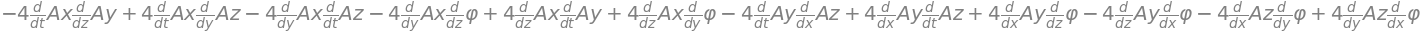

In [20]:
norm_dif = dif(gauge_free_EM_norm, gauge_free_ME_norm)
norm_dif.subs(simpler).expand().display("diff of norms")

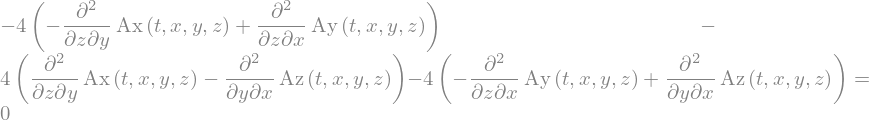

In [21]:
norm_dif_t = euler_equations(norm_dif.t, φ(t, x, y, z), [t, x, y, z])[0]
display(norm_dif_t)
norm_dif_t.lhs.subs(simpler)

Here again, sympy is not "figuring it all out." By grabbing the left-hand side (lhs), the substitutions lead to a zero. Starting at the first term, one should be able to spot the vector identity: $\nabla \cdot (\nabla \times A) = 0$. This is just a different path to the no magnetic monopoles law.

Use the code that generated the Maxwell source equations to do the same for the homogeneous equations:

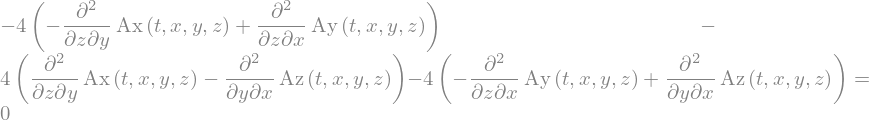

0


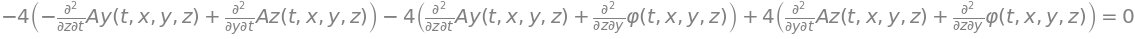

0


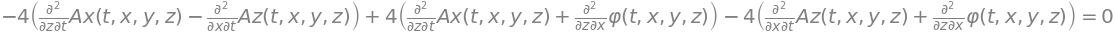

0


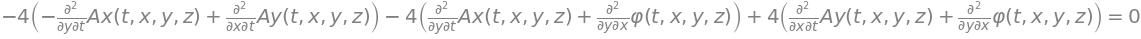

0


In [26]:
for p in p4:
    homogeneous = euler_equations(
                    dif(norm_squared(vector_q(Dq(EM_potential, [t, x, y, z], reverse=False))),
                        norm_squared(vector_q(Dq(EM_potential, [t, x, y, z], reverse=True)))).t, p)[0]
    display(homogeneous)
    print(homogeneous.lhs.subs(simpler))

It will require considerable effort to spot Faraday's law:

$$\frac{\partial B}{\partial t} + \vec{\nabla} \times \vec{E} = \vec{0}$$

It is easier to see that all the terms do cancel. I like that the all the homogeneous equations are generated together.

$$(\nabla \cdot B, \frac{\partial B}{\partial t} + \vec{\nabla} \times \vec{E}) = (0,\vec{0})$$


## Takeaway

Every approach to deriving the Maxwell equations I have seen uses the anti-symmetric rank-2 field strength tensor $F^{\mu\nu}$ which neatly puts electric and magnetic fields in their six separate places. This notebook provides an alternative.

What is electromagnetism? It starts from a space-time potential, every single possible way of making something in EM happen. Make available every possible variation in those potentials by taking all possible space-time derivatives. It is the completeness of both the potential and changes in the potential that feels satisfying. Restrict the investigation to only those where the scalar field is zero. I wish I could say more about that specific step, but for now I just acknowledge the choice gets made. It is required to use both a derivative on the left of the potential and the derivative operator on the right. There is a coupling between the potential and a current density. To these terms one applies the Euler-Lagrange equations, a way of finding functions that are at extremums. That is the way to generate the Maxwell source equations, Gauss's law and Ampere's law together.

The way to generate the homogeneous Maxwell equations follows the same approach. Start this time with something that must always be zero: the difference between the norm squared of the fields with the derivative on the left and the norm squared with the derivative on the right. The result of that algebra is the dot product of the electric and magnetic wave. For a free traveling EM wave, those fields are at 90 degrees to each other so the dot product is zero. It is not a well-known result, but putting the dot product of these two fields into the Euler-Lagrange equations results in the no magnetic monopoles law and Faraday's law.